In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from datetime import datetime
import plotly.express as px
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler
from sklearn.metrics import mean_squared_error


In [2]:
data = pd.read_csv('OnlineRetail.csv', encoding='latin1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [5]:
import datetime as dt

def string_to_date(date_string):
    return dt.datetime.strptime(date_string, "%d-%m-%Y %H:%M")


In [6]:
# Convert InvoiceDate from object to datetime format
data['InvoiceDate'] = data['InvoiceDate'].apply(string_to_date)
# Convert InvoiceDate from "%d-%m-%Y %H:%M" to "%d-%m-%Y"
data['InvoiceDate'] = data['InvoiceDate'].dt.strftime("%d-%m-%Y")



In [7]:
data['InvoiceDate'] = data['InvoiceDate'].astype('datetime64[ns]')


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '14-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '15-12-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packag

In [8]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom


In [9]:
# Drop Na value
data = data.dropna()

In [10]:
data[(data['Quantity'] <= 0) | (data['UnitPrice'] <= 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-01-12,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-09-12,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12,1.25,17315.0,United Kingdom


In [11]:
# Select data have quantity > 0 and unitPrice > 0
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

In [12]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-01-12,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-01-12,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-01-12,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-01-12,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-01-12,1.69,13047.0,United Kingdom


In [13]:
# Tính gross_sales bằng tích của quantity và unit price
data['gross_sales'] = data['Quantity'] * data['UnitPrice']

# Nhóm dữ liệu theo cột 'CustomerID' và tính tổng gross_sales cho mỗi nhóm
gross_sales_total = data.groupby('CustomerID')['gross_sales'].sum().reset_index()

# group by CustomerID and count InvoiceNo
frequence = data.groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [14]:
# data CustomerID == 12346.0
data[data['CustomerID'] == 12346]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,gross_sales
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18,1.04,12346.0,United Kingdom,77183.6


In [15]:
# Ghi DataFrame data_RFM ra tệp CSV
data.to_csv('data_positive.csv', index=False)

### Truc quan hoa

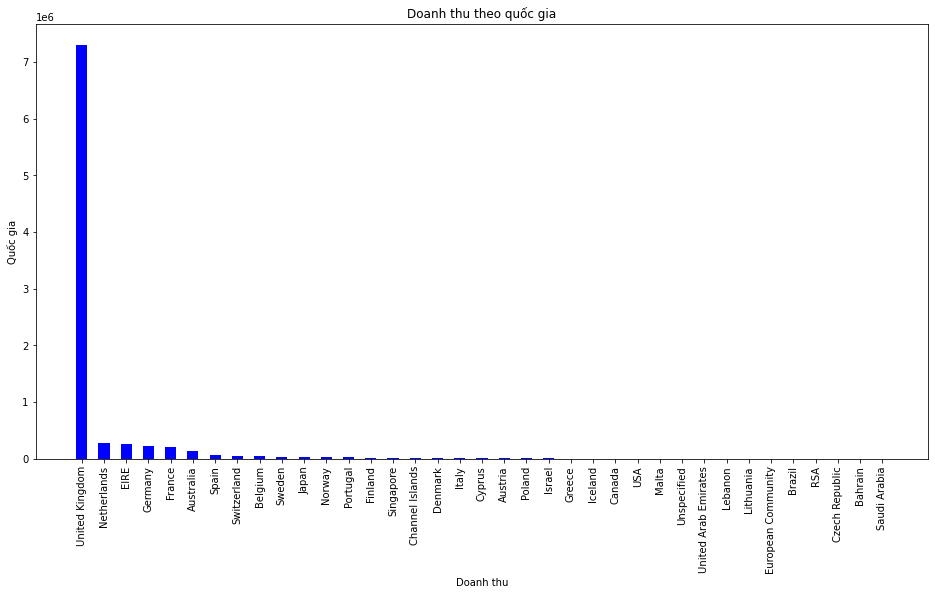

In [17]:
# Nhóm dữ liệu theo quốc gia và tính tổng doanh thu
data_gross_sales_positive = data[data['gross_sales'] > 0]
revenue_by_country = data_gross_sales_positive.groupby('Country')['gross_sales'].sum().reset_index()
revenue_by_country
# Sắp xếp các quốc gia theo doanh thu giảm dần
revenue_by_country = revenue_by_country.sort_values(by='gross_sales', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(16, 8))
plt.bar(revenue_by_country['Country'], revenue_by_country['gross_sales'], color='blue', width=0.5)
plt.xlabel('Doanh thu')
plt.ylabel('Quốc gia')
plt.title('Doanh thu theo quốc gia')
plt.xticks(rotation=90)
plt.savefig('revenue_by_country.png', bbox_inches='tight')
plt.show()

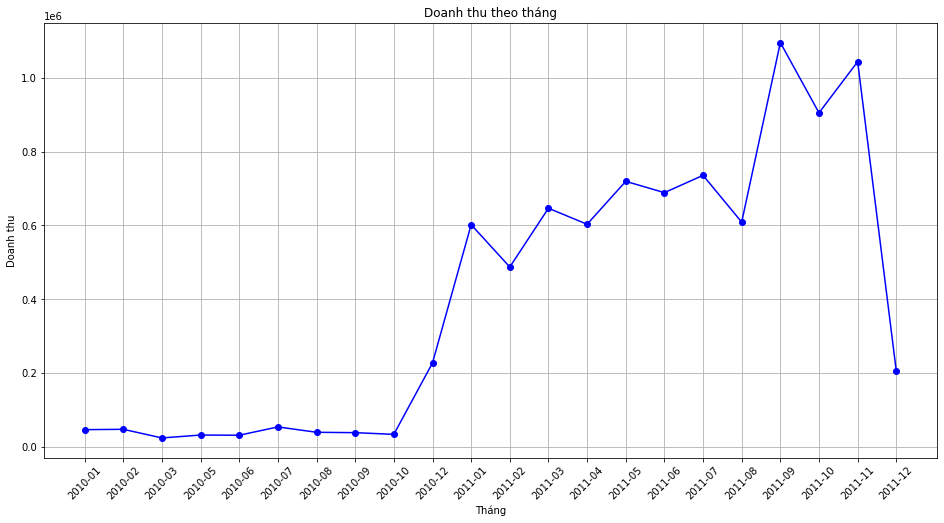

In [18]:

# Tạo cột mới là tháng
data_gross_sales_positive['InvoiceMonth'] = data_gross_sales_positive['InvoiceDate'].dt.to_period('M')

# Nhóm dữ liệu theo tháng và tính tổng doanh thu
revenue_by_month = data_gross_sales_positive.groupby('InvoiceMonth')['gross_sales'].sum().reset_index()

# Sắp xếp các tháng theo thứ tự tăng dần
revenue_by_month = revenue_by_month.sort_values(by='InvoiceMonth')

# Tăng kích thước của biểu đồ
plt.figure(figsize=(16, 8))

# Vẽ biểu đồ đường
plt.plot(revenue_by_month['InvoiceMonth'].astype(str), revenue_by_month['gross_sales'], marker='o', color='blue')

plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.title('Doanh thu theo tháng')

plt.xticks(rotation=45)  # Xoay nhãn trục x để dễ đọc hơn

plt.grid(True)  # Hiển thị lưới
plt.savefig('revenue_by_month.png', bbox_inches='tight')
plt.show()

In [19]:
frequence

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,756


In [20]:
gross_sales_total

,CustomerID,gross_sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4333,18280.0,180.60
4334,18281.0,80.82
4335,18282.0,178.05
4336,18283.0,2094.88


In [21]:
data_new = pd.merge(gross_sales_total, frequence, on='CustomerID')

# Create FRM analysis for each customers

In [22]:
# Convert string to date get max date of dataframe
max_date = data['InvoiceDate'].max().date()
max_date



datetime.date(2011, 12, 10)

In [23]:
Recency = lambda x : (max_date - x.max().date()).days
Frequency = lambda x : len(x.unique())
Monetary = lambda x : round(x.sum(),2)

In [24]:
data_RFM = data.groupby('CustomerID').agg({'InvoiceDate': Recency})

In [25]:
data_RFM.head()

,InvoiceDate
CustomerID,
12346.0,326
12347.0,40
12348.0,76
12349.0,19
12350.0,311


In [26]:
# Merge data
data_RFM = data_RFM.merge(data_new, on='CustomerID')


In [27]:
data_RFM.head()

,CustomerID,InvoiceDate,gross_sales,InvoiceNo
0,12346.0,326,77183.60,1
1,12347.0,40,4310.00,182
2,12348.0,76,1797.24,31
3,12349.0,19,1757.55,73
4,12350.0,311,334.40,17


In [28]:
data_RFM = data_RFM.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'gross_sales': 'Monetary'})
data_RFM.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326,77183.60,1
1,12347.0,40,4310.00,182
2,12348.0,76,1797.24,31
3,12349.0,19,1757.55,73
4,12350.0,311,334.40,17


In [29]:
data_RFM.to_csv('data_RFM_with_id.csv', index=False)

In [30]:
data_RFM = data_RFM.drop(columns=['CustomerID'])

In [31]:
data_RFM.head()

,Recency,Monetary,Frequency
0,326,77183.60,1
1,40,4310.00,182
2,76,1797.24,31
3,19,1757.55,73
4,311,334.40,17


In [32]:
data_RFM.describe()

,Recency,Monetary,Frequency
count,4338.000000,4338.000000,4338.000000
mean,105.502766,2054.266460,91.720609
std,115.089552,8989.230441,228.785094
min,0.000000,3.750000,1.000000
25%,22.000000,307.415000,17.000000
50%,61.000000,674.485000,41.000000
75%,161.750000,1661.740000,100.000000
max,697.000000,280206.020000,7847.000000


In [33]:
# Ghi DataFrame data_RFM ra tệp CSV
data_RFM.to_csv('data_RFM_raw.csv', index=False)


# Preprocessing

In [34]:
data_RFM_copy = data_RFM.copy()

In [35]:
# Check null values
data_RFM_copy.isnull().sum()

Recency      0
Monetary     0
Frequency    0
dtype: int64

In [36]:
data_RFM_copy.describe()

,Recency,Monetary,Frequency
count,4338.000000,4338.000000,4338.000000
mean,105.502766,2054.266460,91.720609
std,115.089552,8989.230441,228.785094
min,0.000000,3.750000,1.000000
25%,22.000000,307.415000,17.000000
50%,61.000000,674.485000,41.000000
75%,161.750000,1661.740000,100.000000
max,697.000000,280206.020000,7847.000000


In [37]:
# Check negative values for 'Recency', 'Frequency', and 'Monetary' columns
data_RFM_copy[(data_RFM_copy['Recency'] == 0) | (data_RFM_copy['Frequency'] == 0) | (data_RFM_copy['Monetary'] ==0)]



,Recency,Monetary,Frequency
30,0,1845.31,87
79,0,5005.46,176
137,0,2056.89,124
165,0,3692.28,191
177,0,4124.69,188
...,...,...,...
4082,0,704.25,21
4251,0,1231.31,54
4297,0,7276.90,164
4331,0,110.38,8


In [38]:
data_RFM_copy = data_RFM_copy[(data_RFM_copy['Recency'] > 0) & (data_RFM_copy['Frequency'] > 0) & (data_RFM_copy['Monetary'] > 0)]

In [39]:
data_RFM_copy.head()

,Recency,Monetary,Frequency
0,326,77183.60,1
1,40,4310.00,182
2,76,1797.24,31
3,19,1757.55,73
4,311,334.40,17


In [40]:
data_RFM_copy.shape

(4265, 3)

In [41]:
print(data_RFM_copy.Recency.shape)
print(data_RFM_copy.Frequency.shape)
print(data_RFM_copy.Monetary.shape)

(4265,)
(4265,)
(4265,)


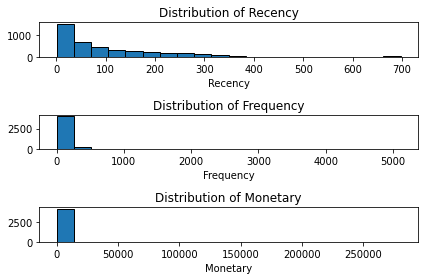

In [42]:
# VẼ hân phối của Recency
plt.subplot(3, 1, 1)
plt.hist(data_RFM_copy['Recency'], bins=20, edgecolor = 'black')
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# VẼ hân phối của Recency
plt.subplot(3, 1, 2)
plt.hist(data_RFM_copy['Frequency'], bins=20, edgecolor = 'black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3)
plt.hist(data_RFM_copy['Monetary'], bins=20, edgecolor = 'black')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

In [43]:
from scipy.stats import boxcox

# Apply Box-Cox transform to each feature
def boxcox_transform(data):
    transformed_data = data.copy()
    lambdas = {}
    for feature in data.columns:
        transformed_data[feature], lambdas[feature] = boxcox(data[feature])
    return transformed_data, lambdas
# lambdas chứa giá trị lambda của từng cột
data_RFM_copy, lambdas = boxcox_transform(data_RFM_copy)
print(lambdas)


{'Recency': 0.18089710795195185, 'Monetary': -0.08129642057765035, 'Frequency': 0.06030038451871976}


In [44]:

data_RFM_copy.head()

,Recency,Monetary,Frequency
0,10.219153,7.373577,0.000000
1,5.245981,6.071087,6.113077
2,6.572462,5.611979,3.815392
3,3.888532,5.599825,4.896592
4,10.085541,4.632088,3.089624


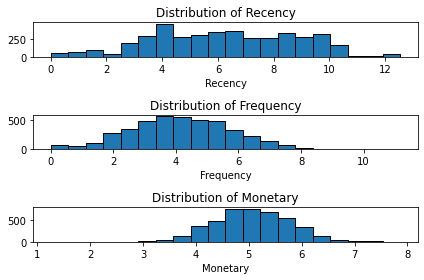

In [45]:
# VẼ hân phối của Recency
plt.subplot(3, 1, 1)
plt.hist(data_RFM_copy['Recency'], bins=20, edgecolor = 'black')
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# VẼ hân phối của Recency
plt.subplot(3, 1, 2)
plt.hist(data_RFM_copy['Frequency'], bins=20, edgecolor = 'black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3)
plt.hist(data_RFM_copy['Monetary'], bins=20, edgecolor = 'black')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

In [46]:
# Khởi tạo Quantile Transformer
quantile_transformer = QuantileTransformer(output_distribution='uniform')

data_RFM_copy[['Recency', 'Frequency', 'Monetary']] = quantile_transformer.fit_transform(data_RFM_copy[['Recency', 'Frequency', 'Monetary']])


In [47]:
data_RFM_copy.head()

,Recency,Monetary,Frequency
0,0.957958,0.998289,0.000000
1,0.376376,0.925014,0.882883
2,0.555055,0.773153,0.425425
3,0.206707,0.766676,0.669670
4,0.944945,0.286347,0.251251


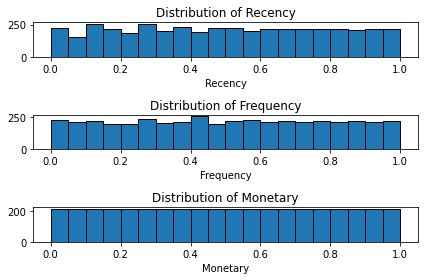

In [48]:
# VẼ hân phối của Recency
plt.subplot(3, 1, 1)
plt.hist(data_RFM_copy['Recency'], bins=20, edgecolor = 'black')
plt.title('Distribution of Recency')
plt.xlabel('Recency')

# VẼ hân phối của Recency
plt.subplot(3, 1, 2)
plt.hist(data_RFM_copy['Frequency'], bins=20, edgecolor = 'black')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')

# Vẽ phân phối của 'Monetary'
plt.subplot(3, 1, 3)
plt.hist(data_RFM_copy['Monetary'], bins=20, edgecolor = 'black')
plt.title('Distribution of Monetary')
plt.xlabel('Monetary')

plt.tight_layout()
plt.show()

# build model

In [49]:
# Create lables for Recency, frequency, Monetary
r_labels = range(4, 0, -1)
f_labels = range(1, 5)
m_labels = range(1, 5)

In [50]:
[*r_labels]

[4, 3, 2, 1]

In [51]:
# Phân đoạn khách hàng
quantiles = data_RFM_copy.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()

def r_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def m_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

data_RFM_copy['R'] = data_RFM_copy['Recency'].apply(r_score, args=('Recency', quantiles))
data_RFM_copy['M'] = data_RFM_copy['Monetary'].apply(m_score, args=('Monetary', quantiles))
data_RFM_copy['F'] = data_RFM_copy['Frequency'].apply(m_score, args=('Frequency', quantiles))


In [52]:
data_RFM_copy.value_counts()

Recency   Monetary  Frequency  R  M  F
0.000000  0.246322  0.585085   4  1  3    1
0.667668  0.473339  0.875876   2  2  4    1
0.664665  0.199033  0.401902   2  1  2    1
          0.486636  0.192693   2  2  1    1
          0.514302  0.875876   2  3  4    1
                                         ..
0.334835  0.672111  0.646146   3  3  3    1
          0.706547  0.653654   3  3  3    1
          0.752861  0.775275   3  4  4    1
          0.757756  0.756757   3  4  4    1
1.000000  0.404088  0.192693   1  2  1    1
Length: 4265, dtype: int64

In [53]:
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])
data_RFM_copy['RFM_Score'] = data_RFM_copy.apply(join_rfm, axis=1)
data_RFM_copy.head()

,Recency,Monetary,Frequency,R,M,F,RFM_Score
0,0.957958,0.998289,0.000000,1,4,1,1.01.04.0
1,0.376376,0.925014,0.882883,3,4,4,3.04.04.0
2,0.555055,0.773153,0.425425,2,4,2,2.02.04.0
3,0.206707,0.766676,0.669670,4,4,3,4.03.04.0
4,0.944945,0.286347,0.251251,1,2,1,1.01.02.0


In [54]:
rfm_count_unique = data_RFM_copy.groupby('RFM_Score')['RFM_Score'].nunique()
rfm_count_unique.sum()

61

In [55]:
# Calculate RFM_Score
data_RFM_copy['RFM_Score'] = data_RFM_copy[[ 'R', 'F', 'M']].sum(axis=1)
data_RFM_copy.head()

,Recency,Monetary,Frequency,R,M,F,RFM_Score
0,0.957958,0.998289,0.000000,1,4,1,6
1,0.376376,0.925014,0.882883,3,4,4,11
2,0.555055,0.773153,0.425425,2,4,2,8
3,0.206707,0.766676,0.669670,4,4,3,11
4,0.944945,0.286347,0.251251,1,2,1,4


In [56]:
print(f'So luong cua cac lop trong feature R:\n {data_RFM_copy.R.value_counts()}')
print(f'So luong cua cac lop trong feature F:\n {data_RFM_copy.F.value_counts()}')
print(f'So luong cua cac lop trong feature M:\n {data_RFM_copy.M.value_counts()}')



So luong cua cac lop trong feature R:
 4    1118
2    1064
1    1061
3    1022
Name: R, dtype: int64
So luong cua cac lop trong feature F:
 1    1100
2    1059
4    1055
3    1051
Name: F, dtype: int64
So luong cua cac lop trong feature M:
 1    1067
4    1066
2    1066
3    1066
Name: M, dtype: int64


In [57]:
data_RFM_copy.sample(5)

,Recency,Monetary,Frequency,R,M,F,RFM_Score
436,0.376376,0.816537,0.729229,3,4,3,10
3517,0.283283,0.165128,0.208208,3,1,1,5
1444,0.361361,0.747451,0.717217,3,3,3,9
3918,0.365365,0.775992,0.763263,3,4,4,11
3891,0.436436,0.884282,0.780280,3,4,4,11


Stars: Nhóm này bao gồm các khách hàng có mức Recency và Frequency cao, nhưng Monetary Value thấp. Đây có thể là những khách hàng mới và tiềm năng, nhưng vẫn chưa chi tiêu nhiều.

Big Spender: Đây là nhóm các khách hàng có giá trị chi tiêu lớn, thể hiện qua điểm Monetary Value cao. Họ có thể không mua hàng thường xuyên nhưng chi tiêu lớn khi mua.

Regulars: Nhóm này bao gồm các khách hàng mua hàng thường xuyên với mức Frequency cao, nhưng Monetary Value không cần phải quá cao. Họ có thể không chi tiêu nhiều mỗi lần mua, nhưng tần suất mua hàng đều đặn.

Active: Nhóm này bao gồm các khách hàng có mức Recency và Frequency cao, nhưng Monetary Value không cần phải lớn. Họ là những khách hàng thường xuyên mua hàng gần đây, nhưng có thể mua các sản phẩm có giá trị thấp.

Loyal: Đây là nhóm các khách hàng có mức Recency, Frequency, và Monetary Value đều cao. Họ là những khách hàng trung thành và mang lại nhiều giá trị cho doanh nghiệp.

Lost: Nhóm này bao gồm các khách hàng có mức Recency thấp, Frequency thấp, và Monetary Value thấp. Đây có thể là những khách hàng đã từng mua hàng nhưng không quay lại.

Light: Nhóm này bao gồm các khách hàng có mức Recency và Frequency thấp, nhưng Monetary Value cao. Họ có thể mua hàng ít nhưng chi tiêu lớn mỗi lần mua.

In [58]:
quantiles_R = data_RFM_copy['R'].quantile(q=[0.25, 0.5, 0.75])

quantiles_M = data_RFM_copy['M'].quantile(q=[0.25, 0.5, 0.75])

quantiles_F = data_RFM_copy['F'].quantile(q=[0.25, 0.5, 0.75])

# quantile to dict
quantiles_R = quantiles_R.to_dict()

quantiles_M = quantiles_M.to_dict()

quantiles_F = quantiles_F.to_dict()

In [59]:
print(f"quantiles of F: {quantiles_F}")
print(f"quantiles of R: {quantiles_R}")
print(f"quantiles of M: {quantiles_M}")

quantiles of F: {0.25: 1.0, 0.5: 2.0, 0.75: 3.0}
quantiles of R: {0.25: 2.0, 0.5: 3.0, 0.75: 4.0}
quantiles of M: {0.25: 1.0, 0.5: 2.0, 0.75: 3.0}


In [60]:
# Phân loại khách hàng
def rfm_level(df):
    if df['RFM_Score'] == 12:
        return 'Stars'
    elif df['R'] == 4 and df['F'] <= 2 and df['M'] <= 2:
        return 'New'
    elif df['RFM_Score'] == 4:
        return 'Big Spender'
    elif df['R'] >= 3 and df['F'] >= 3 and df['M'] >= 2:
        return 'Loyal'
    elif df['R'] >= 2 and df['F'] >= 3:
        return 'Active'
    elif df['R'] == 1 and df['F'] >= 3 and df['M'] >= 3:
        return 'Lost'
    elif df['F'] == 1:
        return 'Light'
    else:
        return 'Regulars'



In [61]:
# Create a new column RFM_level
data_RFM_copy['RFM_Level'] = data_RFM_copy.apply(rfm_level, axis=1)
data_RFM_copy.head(10)

,Recency,Monetary,Frequency,R,M,F,RFM_Score,RFM_Level
0,0.957958,0.998289,0.000000,1,4,1,6,Light
1,0.376376,0.925014,0.882883,3,4,4,11,Loyal
2,0.555055,0.773153,0.425425,2,4,2,8,Regulars
3,0.206707,0.766676,0.669670,4,4,3,11,Loyal
4,0.944945,0.286347,0.251251,1,2,1,4,Big Spender
5,0.537037,0.842245,0.709710,2,4,3,9,Active
6,0.819319,0.027023,0.047047,1,1,1,3,Light
7,0.849850,0.645640,0.604104,1,3,3,7,Lost
8,0.619620,0.385997,0.192693,2,2,1,5,Light
9,0.252753,0.864927,0.609109,4,4,3,11,Loyal


## Dữ liệu gốc

In [62]:
# Chuyển đổi ngược lại dữ liệu
data_RFM_invert = quantile_transformer.inverse_transform(data_RFM_copy[['Recency', 'Frequency', 'Monetary']])
# Convert data_RFM_invert to dataframe
data_RFM_invert = pd.DataFrame(data_RFM_invert, columns=['Recency', 'Frequency', 'Monetary'])

In [63]:
from scipy.special import inv_boxcox
# Chuyển đổi ngược lại từ dữ liệu đã được biến đổi bằng Box-Cox transform
data_RFM_invert['Monetary'] = inv_boxcox(data_RFM_invert['Monetary'], lambdas['Monetary'])
data_RFM_invert['Recency'] = inv_boxcox(data_RFM_invert['Recency'], lambdas['Recency'])
data_RFM_invert['Frequency'] = inv_boxcox(data_RFM_invert['Frequency'], lambdas['Frequency'])

In [64]:
data_RFM_invert.head()

,Recency,Frequency,Monetary
0,326.0,1.0,77183.60
1,40.0,182.0,4310.00
2,76.0,31.0,1797.24
3,19.0,73.0,1757.55
4,311.0,17.0,334.40


In [65]:
data_RFM_invert['RFM_Level'] = data_RFM_copy['RFM_Level']
data_RFM_invert.head()

,Recency,Frequency,Monetary,RFM_Level
0,326.0,1.0,77183.60,Light
1,40.0,182.0,4310.00,Loyal
2,76.0,31.0,1797.24,Regulars
3,19.0,73.0,1757.55,Loyal
4,311.0,17.0,334.40,Big Spender


In [66]:
# Calculate average values for each RFM_level and return a size of each segment
rfm_agg_0 = data_RFM_invert.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)

In [67]:
rfm_agg_0.columns = rfm_agg_0.columns.droplevel()
rfm_agg_0.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
rfm_agg_0['Percent'] = round(rfm_agg_0['Count'] / rfm_agg_0.Count.sum() * 100, 2)
rfm_agg_0

,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
RFM_Level,,,,,
Active,106.88,79.55,1683.34,478,11.39
Big Spender,105.26,94.70,2210.85,365,8.70
Light,109.76,79.61,1672.47,711,16.95
Lost,111.84,71.70,1887.28,124,2.96
Loyal,108.45,84.16,1685.17,970,23.12
New,99.44,95.86,2895.87,205,4.89
Regulars,106.56,94.21,2311.24,942,22.46
Stars,111.08,95.48,1976.35,400,9.54


In [68]:
# Reset the index
rfm_agg_0 = rfm_agg_0.reset_index()
rfm_agg_0

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Active,106.88,79.55,1683.34,478,11.39
1,Big Spender,105.26,94.70,2210.85,365,8.70
2,Light,109.76,79.61,1672.47,711,16.95
3,Lost,111.84,71.70,1887.28,124,2.96
4,Loyal,108.45,84.16,1685.17,970,23.12
5,New,99.44,95.86,2895.87,205,4.89
6,Regulars,106.56,94.21,2311.24,942,22.46
7,Stars,111.08,95.48,1976.35,400,9.54


In [69]:
# Ghi DataFrame data_RFM ra tệp CSV
rfm_agg_0.to_csv('data_RFM_mean.csv', index=False)

## Dữ liệu đã scale

In [70]:
data_RFM_copy.RFM_Level.unique()

array(['Light', 'Loyal', 'Regulars', 'Big Spender', 'Active', 'Lost',
       'Stars', 'New'], dtype=object)

In [71]:
data_RFM_copy['RFM_Level'].value_counts()

Loyal          983
Regulars       952
Light          729
Active         486
Stars          406
Big Spender    373
New            208
Lost           128
Name: RFM_Level, dtype: int64

In [72]:
# Calculate average values for each RFM_level and return a size of each segment
rfm_agg = data_RFM_copy.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)

In [73]:
rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
rfm_agg['Percent'] = (rfm_agg['Count'] / rfm_agg.Count.sum()) * 100
rfm_agg

,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
RFM_Level,,,,,
Active,0.59,0.70,0.62,486,11.395076
Big Spender,0.76,0.20,0.17,373,8.745604
Light,0.69,0.13,0.24,729,17.092614
Lost,0.84,0.71,0.68,128,3.001172
Loyal,0.28,0.74,0.69,983,23.048066
New,0.14,0.26,0.26,208,4.876905
Regulars,0.63,0.41,0.42,952,22.321219
Stars,0.12,0.91,0.91,406,9.519343


In [74]:
# Reset the index
rfm_agg = rfm_agg.reset_index()
rfm_agg

,RFM_Level,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Active,0.59,0.70,0.62,486,11.395076
1,Big Spender,0.76,0.20,0.17,373,8.745604
2,Light,0.69,0.13,0.24,729,17.092614
3,Lost,0.84,0.71,0.68,128,3.001172
4,Loyal,0.28,0.74,0.69,983,23.048066
5,New,0.14,0.26,0.26,208,4.876905
6,Regulars,0.63,0.41,0.42,952,22.321219
7,Stars,0.12,0.91,0.91,406,9.519343


In [75]:
rfm_agg_copy = rfm_agg.copy()

findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.


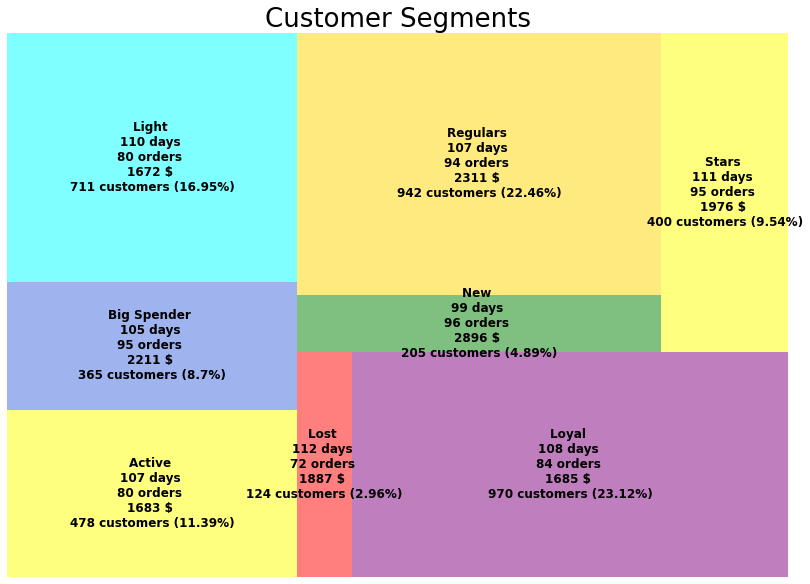

In [76]:
# Create our plot and resize it
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)
colors_dict = {'Active': 'yellow', 'Big Spender': 'royalblue', 'Light': 'cyan', 'Lost': 'red', 'Loyal': 'purple', 'Regulars': 'green', 'Stars': 'gold'}
squarify.plot(sizes=rfm_agg_0['Count'],
              text_kwargs={'fontsize': 12, 'weight': 'bold', 'fontname': 'sans serif'},
              color = colors_dict.values(),
              label = ["{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)".format(*rfm_agg_0.iloc[i]) for i in range(0, len(rfm_agg_0))]
              , alpha=.5)
plt.title('Customer Segments', fontsize=26, fontname='bold')
plt.axis('off')
plt.savefig('RFM_Segments.png')
plt.show()

In [77]:
fig = px.scatter(rfm_agg_0, x='RecencyMean', y='MonetaryMean', color='RFM_Level', size='FrequencyMean', hover_name = 'RFM_Level', size_max = 50)
fig.show()

# RFM + KMEANs

In [78]:
df_now = data_RFM_copy[['Recency', 'Frequency', 'Monetary']]
df_now.head()

,Recency,Frequency,Monetary
0,0.957958,0.000000,0.998289
1,0.376376,0.882883,0.925014
2,0.555055,0.425425,0.773153
3,0.206707,0.669670,0.766676
4,0.944945,0.251251,0.286347


In [79]:
df_now.shape

(4265, 3)

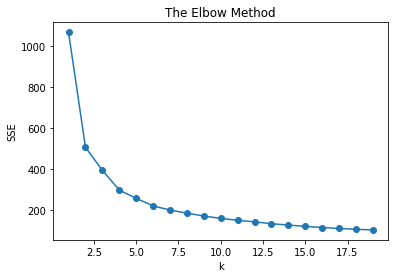

In [80]:
from sklearn.cluster import KMeans
sse = {}
for  k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_now)
    sse[k] = kmeans.inertia_
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(list(sse.keys()), list(sse.values()), marker = 'o')
plt.show()

#

In [81]:
# Build model with k = 5
model = KMeans(n_clusters=5, random_state=42)
model.fit(df_now)



KMeans(n_clusters=5, random_state=42)

## Dữ liệu đã scale

In [82]:
df_now['Cluster'] = model.labels_
df_now.groupby('Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': ['mean', 'count']}).round(2)

C:\Users\admin\AppData\Local\Temp\ipykernel_7944\3585565495.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          0.24      0.56     0.56   700
1          0.70      0.56     0.58   917
2          0.83      0.21     0.20  1016
3          0.25      0.86     0.85  1005
4          0.37      0.23     0.23   627

In [83]:
# Calculate average values for each RFM_levels, and return a size of each segment
rfm_agg2 = df_now.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count'] / rfm_agg2.Count.sum()) * 100,2)

# Reset index
rfm_agg2 = rfm_agg2.reset_index()

# Change the cluster columns datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster ' + rfm_agg2['Cluster'].astype(str)

rfm_agg2

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,0.24,0.56,0.56,700,16.41
1,Cluster 1,0.70,0.56,0.58,917,21.50
2,Cluster 2,0.83,0.21,0.20,1016,23.82
3,Cluster 3,0.25,0.86,0.85,1005,23.56
4,Cluster 4,0.37,0.23,0.23,627,14.70


## Dữ liệu gốc

In [85]:
data_RFM_invert['Cluster'] = model.labels_
data_RFM_invert.groupby('Cluster').agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary': ['mean', 'count']}).round(5)

Recency  Frequency    Monetary      
              mean       mean        mean count
Cluster                                        
0         24.08429   58.57429  1057.49511   700
1        152.59106   62.52563  1478.02067   917
2        241.44390   15.52657   256.90015  1016
3         28.39204  246.01692  5802.31034  1005
4         43.13397   16.53110   301.44755   627

In [86]:
# Calculate average values for each RFM_levels, and return a size of each segment
rfm_agg_0 = data_RFM_invert.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(2)

rfm_agg_0.columns = rfm_agg_0.columns.droplevel()
rfm_agg_0.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
rfm_agg_0['Percent'] = round((rfm_agg_0['Count'] / rfm_agg_0.Count.sum()) * 100,2)

# Reset index
rfm_agg_0 = rfm_agg_0.reset_index()

# Change the cluster columns datatype into discrete values
rfm_agg_0['Cluster'] = 'Cluster ' + rfm_agg_0['Cluster'].astype(str)

rfm_agg_0

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Cluster 0,24.08,58.57,1057.50,700,16.41
1,Cluster 1,152.59,62.53,1478.02,917,21.50
2,Cluster 2,241.44,15.53,256.90,1016,23.82
3,Cluster 3,28.39,246.02,5802.31,1005,23.56
4,Cluster 4,43.13,16.53,301.45,627,14.70


In [87]:
# Tạo một từ điển ánh xạ giữa tên nhóm mới và tên nhóm cũ
new_cluster_names = {
    'Cluster 0': 'Regular',
    'Cluster 1': 'Loyal',
    'Cluster 2': 'Low-Value',
    'Cluster 3': 'Big Spenders',
    'Cluster 4': 'Inactive Customers'
}

# Đổi tên các nhóm trong DataFrame
rfm_agg_0['Cluster'] = rfm_agg_0['Cluster'].map(new_cluster_names)
rfm_agg_0

,Cluster,RecencyMean,FrequencyMean,MonetaryMean,Count,Percent
0,Regular,24.08,58.57,1057.50,700,16.41
1,Loyal,152.59,62.53,1478.02,917,21.50
2,Low-Value,241.44,15.53,256.90,1016,23.82
3,Big Spenders,28.39,246.02,5802.31,1005,23.56
4,Inactive Customers,43.13,16.53,301.45,627,14.70


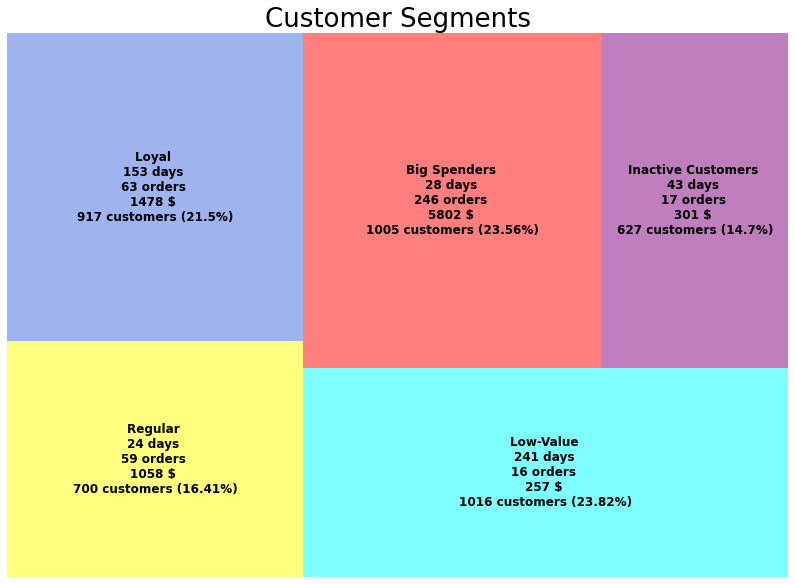

In [88]:
# Create out plot and resize it
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)
colors_dict2 = {'Regular': 'yellow', 'Loyal': 'royalblue', 'Low-Value': 'cyan', 'Big Spenders': 'red', 'Inactive Customers':
                'purple', 'Cluster 5': 'green', 'Cluster 6': 'gold'}
squarify.plot(sizes=rfm_agg_0['Count'],
              text_kwargs={'fontsize': 12, 'weight': 'bold', 'fontname': 'sans serif'},
              color=colors_dict2.values(),
              label=["{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)".format(*rfm_agg_0.iloc[i]) for i
                     in range(0, len(rfm_agg_0))], alpha=.5)
plt.title('Customer Segments', fontsize=26, fontname='bold')
plt.axis('off')
plt.savefig('Unsupervised Segments.png')
plt.show()

In [89]:
fig = px.scatter(rfm_agg_0, x='RecencyMean', y='MonetaryMean', color='Cluster', size='FrequencyMean', hover_name = 'Cluster', size_max = 100)
fig.show()

In [90]:
# Save model
import pickle
filename = 'rfm_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [91]:
# create new data and predict cluster of new data
loaded_model = pickle.load(open(filename, 'rb' ))
df_new = df_now[['Recency', 'Frequency', 'Monetary']].sample(1)

result = loaded_model.predict(df_new)

print(f'Khách hàng có id {df_new.index[0]} được phân vào nhóm {result}')

Khách hàng có id 2431 được phân vào nhóm [1]


# RFM hierarchical clusterin

In [92]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [93]:
df_now = data_RFM_copy[['Recency', 'Frequency', 'Monetary']]
df_now.head()

,Recency,Frequency,Monetary
0,0.957958,0.000000,0.998289
1,0.376376,0.882883,0.925014
2,0.555055,0.425425,0.773153
3,0.206707,0.669670,0.766676
4,0.944945,0.251251,0.286347


In [94]:
# Ghi DataFrame data_RFM ra tệp CSV
df_now.to_csv('data_RFM_train.csv', index=False)

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score


silhouette_scores = []
# Tìm số lượng cụm tối ưu
max_clusters = 10
affinities = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
linkages = ['complete', 'average', 'single']  # Loại bỏ 'ward'
best_score = -1
best_params = {'n_clusters': 0, 'affinity': '', 'linkage': ''}
for n_clusters in range(3, max_clusters + 1):
    for affinity in affinities:
        for linkage in linkages:
            if linkage != 'ward':
                model_1 = AgglomerativeClustering(n_clusters=n_clusters, affinity=affinity, linkage=linkage)
                labels = model_1.fit_predict(df_now)
                silhouette_avg = silhouette_score(df_now, labels)
                silhouette_scores.append((n_clusters, affinity, linkage, silhouette_avg))
                print(f"n_clusters={n_clusters}, affinity={affinity}, linkage={linkage}, silhouette_score={silhouette_avg}")
                if silhouette_avg > best_score:
                    best_score = silhouette_avg
                    best_params['n_clusters'] = n_clusters
                    best_params['affinity'] = affinity
                    best_params['linkage'] = linkage

print("Best Parameters:", best_params)



n_clusters=3, affinity=euclidean, linkage=complete, silhouette_score=0.28429214126188074
n_clusters=3, affinity=euclidean, linkage=average, silhouette_score=0.31369428331231825
n_clusters=3, affinity=euclidean, linkage=single, silhouette_score=0.15463104001865266
n_clusters=3, affinity=l1, linkage=complete, silhouette_score=0.265084148433219
n_clusters=3, affinity=l1, linkage=average, silhouette_score=0.34223201822028976
n_clusters=3, affinity=l1, linkage=single, silhouette_score=0.1446223358943584
n_clusters=3, affinity=l2, linkage=complete, silhouette_score=0.28429214126188074
n_clusters=3, affinity=l2, linkage=average, silhouette_score=0.31369428331231825
n_clusters=3, affinity=l2, linkage=single, silhouette_score=0.15463104001865266
n_clusters=3, affinity=manhattan, linkage=complete, silhouette_score=0.265084148433219
n_clusters=3, affinity=manhattan, linkage=average, silhouette_score=0.34223201822028976
n_clusters=3, affinity=manhattan, linkage=single, silhouette_score=0.144622335

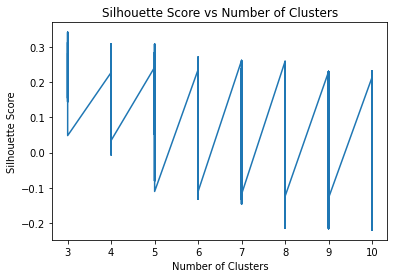

In [96]:
# Tách silhouette_avg từ list of tuples
n_clusters_list, affinity_list, linkage_list, silhouette_avg_list = zip(*silhouette_scores)

# Vẽ đồ thị
plt.plot(n_clusters_list, silhouette_avg_list)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.show()

In [97]:
print("Best Parameters:", best_params)

Best Parameters: {'n_clusters': 3, 'affinity': 'l1', 'linkage': 'average'}


In [98]:
params = {"n_clusters":5, "affinity":"euclidean", "linkage":"average"}

In [99]:
# Trực quan hóa dữ liệu
model = AgglomerativeClustering(**params)
labels = model.fit_predict(df_now)


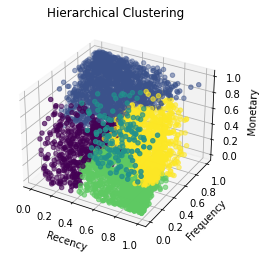

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Tạo figure và axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df_now['Recency'], df_now['Frequency'], df_now['Monetary'], c=labels, cmap='viridis')

# Đặt nhãn cho các trục
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# Hiển thị plot
plt.title("Hierarchical Clustering")
plt.show()


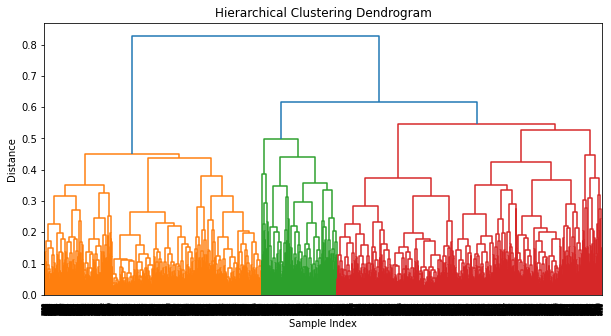

In [102]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_now, metric = "euclidean", method = "average", )
# Vẽ dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()

In [103]:
filename_1 = 'rfm_hierarchical_model.sav'
pickle.dump(model_1, open(filename_1, 'wb'))

In [104]:
# create new data and predict cluster of new data
loaded_model = pickle.load(open(filename_1, 'rb' ))
df_new = data_RFM[['Recency', 'Frequency', 'Monetary']].sample(1)

data = data_RFM[['Recency', 'Frequency', 'Monetary']]
all_data = data.append(df_new)
loaded_model.fit(all_data)

# Get the cluster labels for the new data point
cluster_labels = loaded_model.labels_[-1]

print(f'Khách hàng có id {df_new.index[0]} được phân vào nhóm {cluster_labels}')

C:\Users\admin\AppData\Local\Temp\ipykernel_7944\705314171.py:6: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Khách hàng có id 2850 được phân vào nhóm 0
